Datasource link: [Kaggle: Cleveland UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv)

In [1]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!wget https://raw.githubusercontent.com/rpazuki/MLCourse/main/utils.py
from utils import *

### First, load the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rpazuki/MLCourse/main/heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Next, analysing the data provides insight about __hypothesis space__, and consequently, the ML method and algorithm.

> Here, we plot the histogram for different discrete attributes, separated by heart disease binary condition.

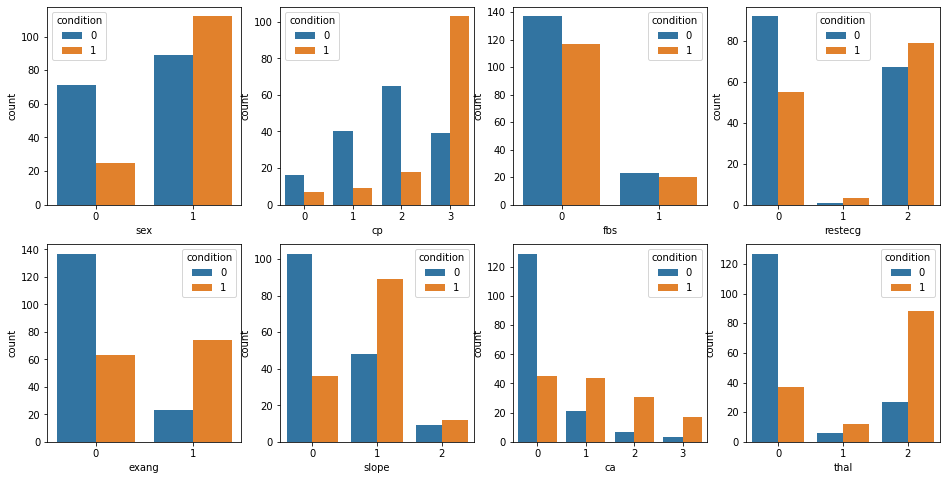

In [3]:
features = ["sex", "cp", "fbs" , "restecg", "exang","slope", "ca", "thal"]
fig = plt.figure(figsize=(16,8))
for i, feature in enumerate(features):
    fig.add_subplot(2, 4, i+1)
    sns.countplot(data=df, x=feature,hue='condition')

> And also, a grid plot for comparing two by two scatter plots of continuous quantities.

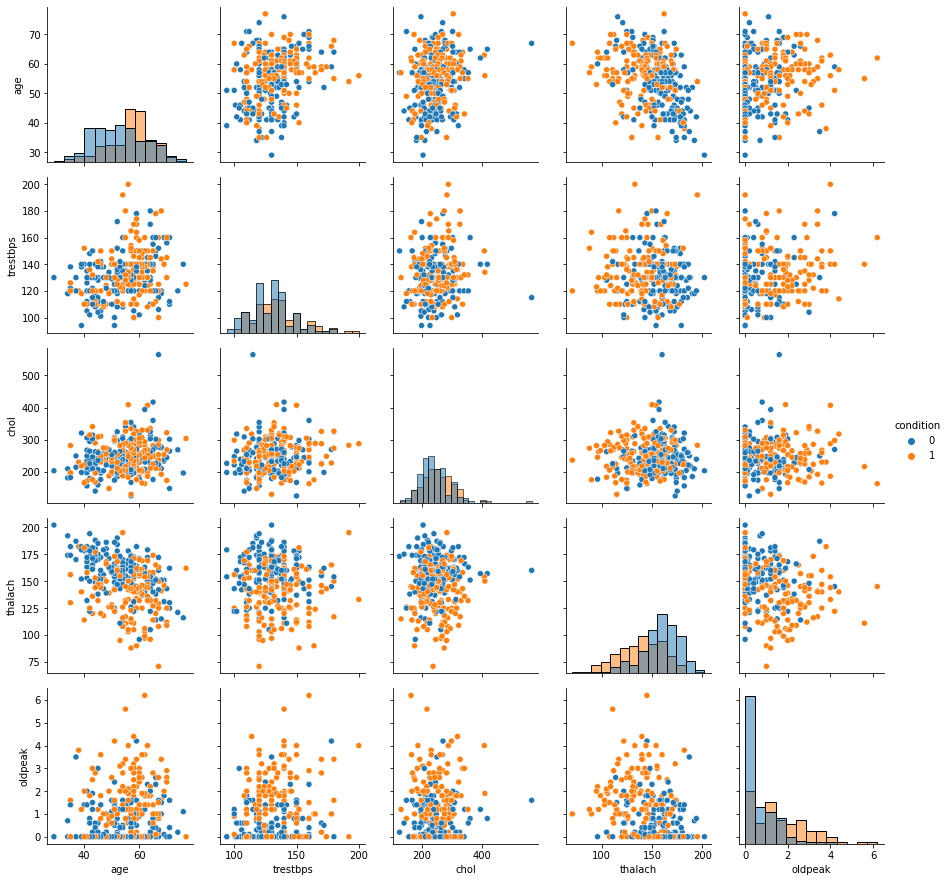

In [4]:
g = sns.PairGrid(df[["age", "trestbps", "chol","thalach","oldpeak","condition"]], hue="condition")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Divide the dataset to Train and test, using scikit-learn __train_test_split__ function

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['condition'], axis=1)
y = df["condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the model by __Logistic Regression__ model and predict the values of the test set.

In [6]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

### Estimate the classification performance

In [7]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print(f"Prediction Accuracy: {accuracy*100:.1f}%")
print(f"recall Accuracy: {recall:.3f}")
print(f"Prediction precision: {precision:.3f}")

Prediction Accuracy: 78.8%
recall Accuracy: 0.791
Prediction precision: 0.739


> Confusion Matrix

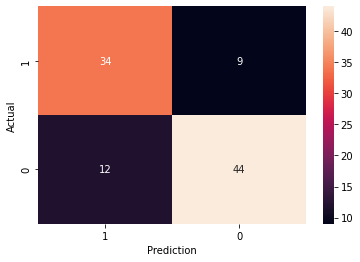

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, y_pred)
cm_p = sns.heatmap(confusion_m, annot=True)
cm_p.set_xlabel("Prediction")
cm_p.set_ylabel("Actual")
cm_p.invert_xaxis()
cm_p.invert_yaxis()

> ROC curve

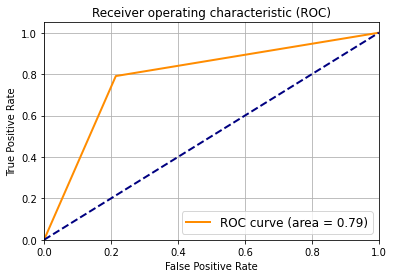

In [9]:
# Compute ROC curve and ROC area for conditions
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_pred)
roc_auc = metrics.auc(fpr, tpr)
_ = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})" ,)
plot_ROC_general(ax, "Receiver operating characteristic (ROC)")
plt.show()

### Logistic regression can predict the probability of an outcome

In [11]:
y_pred_prob = reg.predict_proba(X_test)

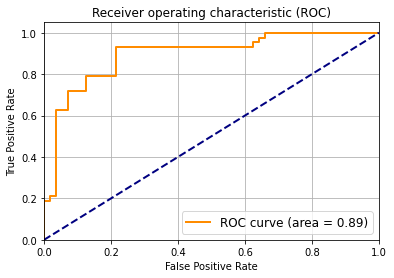

In [13]:
# Compute ROC curve and ROC area for conditions
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
_ = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:0.2f})" ,)
plot_ROC_general(ax, "Receiver operating characteristic (ROC)")
plt.show()